In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
ev = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [4]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN                                                191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [5]:
ev.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [6]:
ev.drop(['Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [7]:
ev.head()

,VIN,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,5YJSA1E22K,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,POINT (-122.300312 47.629782)
1,3MW39FS05R,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,POINT (-120.2658133 46.4063477)
2,1N4AZ0CP0F,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,POINT (-122.201564 47.402358)
3,5YJSA1H20F,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,POINT (-122.206146 47.839957)
4,JTMAB3FV1N,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-120.611068 46.596645)


In [8]:
ev.shape

(191407, 11)

In [9]:
ev.isna().sum()

VIN                                                  0
County                                               4
City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Vehicle Location                                     8
dtype: int64

In [10]:
ev = ev.dropna()

# Lets check from which country we have more entries from (Top 10)

In [11]:
Countries = ev.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = ev.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Countries)[:10],y=values[:10],labels={'x':"Country Name",'y':"Number of Cars"},color=values[:10])

In [12]:
# Grouping by County and Type and counting the number of vehicles in each category
grouped_data = ev.groupby(['County', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Sorting the data to get the top 10 counties by number of cars
top_counties = grouped_data.groupby('County')['Count'].sum().sort_values(ascending=False).head(10).index
filtered_data = grouped_data[grouped_data['County'].isin(top_counties)]

# Plotting the bar chart with color based on the Type of vehicle
fig = px.bar(filtered_data, x='County', y='Count', color='Electric Vehicle Type', labels={'County': "County Name", 'Count': "Number of Cars"})
fig.show()


<ipython-input-13-08a7067a35a8>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




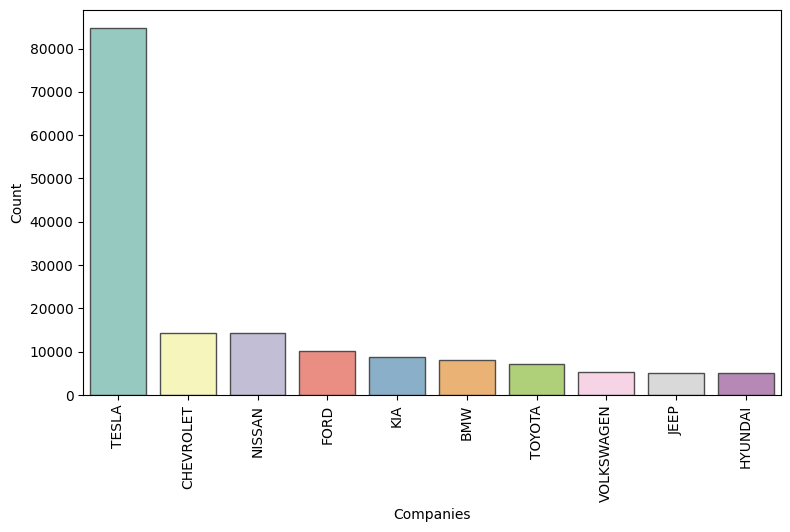

In [13]:
# lets see which company makes most of the electric vehicles
Companies = ev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = ev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values

plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.3',palette='Set3')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [14]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

In [18]:
# what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = ev[ev['Make']==i] # Indent this line
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index # Indent this line
    print('Top selling model for', i, 'is ----------->',data[0]) # Indent this line

Top selling model for TESLA is -----------> MODEL Y
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for NISSAN is -----------> LEAF
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for KIA is -----------> NIRO
Top selling model for BMW is -----------> X5
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for JEEP is -----------> WRANGLER
Top selling model for HYUNDAI is -----------> IONIQ 5


In [21]:
# Percentage of BEV vs PHEV

Vehicle_type = list(ev.groupby('Electric Vehicle Type').count()['County'].index)
values = ev.groupby('Electric Vehicle Type').count()['County'].values

fig = px.pie(names=Vehicle_type,values=values,width=500,height=400)
fig.show()

In [23]:
# lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = ev[ev['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index) # Fix typo here: labels, not lables
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

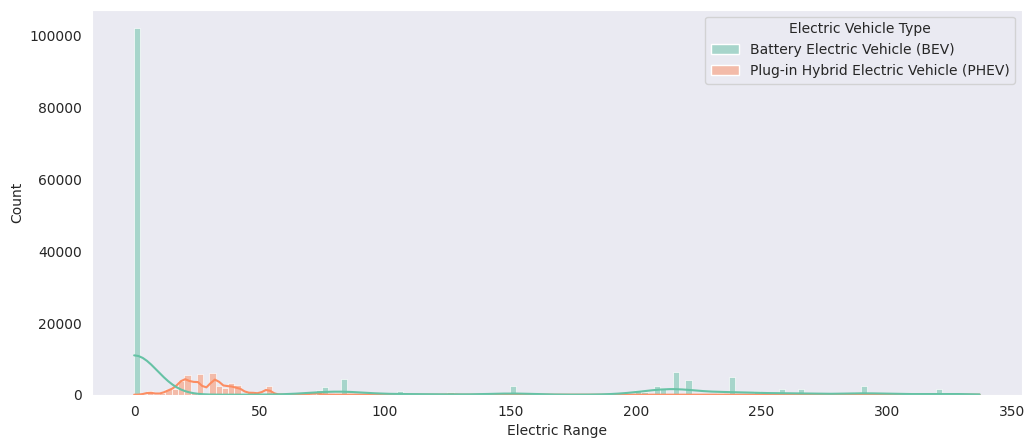

In [24]:
# Lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range', data=ev,kde=True,hue='Electric Vehicle Type',palette='Set2')

In [25]:
# the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV
ev[ev['Electric Range']==0].shape

(102132, 11)

<ipython-input-26-3e64a400cb6e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

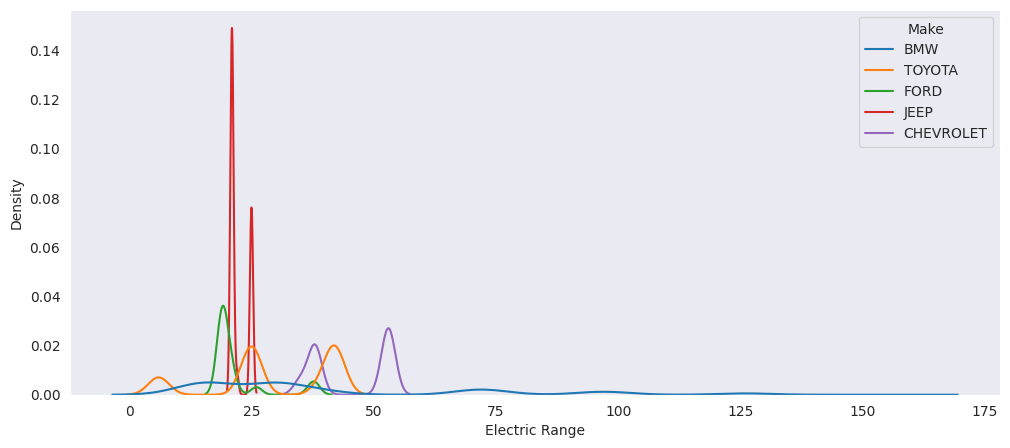

In [26]:
# lets filter out Top 5 companies as per each Electric Vehicle type
# PHEV

data_phev = ev[ev['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies = list(data_phev.groupby('Make').count().sort_values(by = 'City', ascending = False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x: 1 if x in companies else 0)
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(12,5))
sns.kdeplot(x='Electric Range', hue = 'Make', data = data_phev)

<Axes: xlabel='Electric Range', ylabel='Density'>

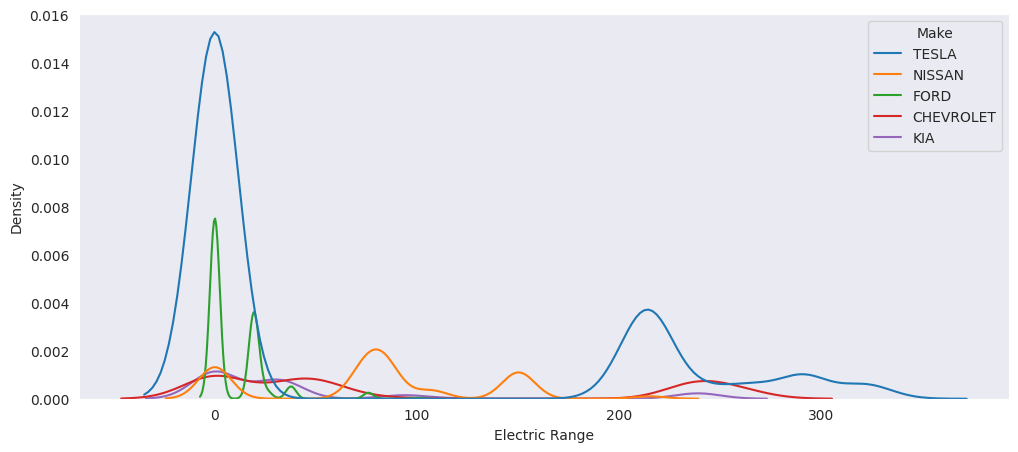

In [28]:
# BEV
data_bev = ev[ev['Electric Vehicle Type']!='Plug -in Hybrid Electric Vehicle (PHEV)']
companies = list(data_bev.groupby('Make').count().sort_values(by = 'City', ascending = False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x: 1 if x in companies else 0)
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(12,5))
sns.kdeplot(x='Electric Range', hue = 'Make', data = data_bev)

In [29]:
# Lets see top20 most sold cars and Top20 most range giving vehicles and check if there is any correlation
top_10_vehicles = list(ev.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]

In [30]:
top_10_range = ev.sort_values('Electric Range',ascending=False)['Model'].unique()[:10]

In [31]:
top_10_vehicles

['MODEL Y',
 'MODEL 3',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'MODEL X',
 'VOLT',
 'ID.4',
 'MUSTANG MACH-E',
 'WRANGLER']

In [32]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

In [33]:
data = ev.copy()

# Top 10 companies
top_10_companies = data['Make'].value_counts().head(10).index

# Filtering data for top 10 companies and last 10 years
data['top_10'] = data['Make'].apply(lambda x: 1 if x in top_10_companies else 0)
data = data[data['top_10'] == 1]
data = data[data['Model Year'] >= 2014]  # Adjusted to last 10 years


# Number of Models of Companies per Year (Last 10 Years)

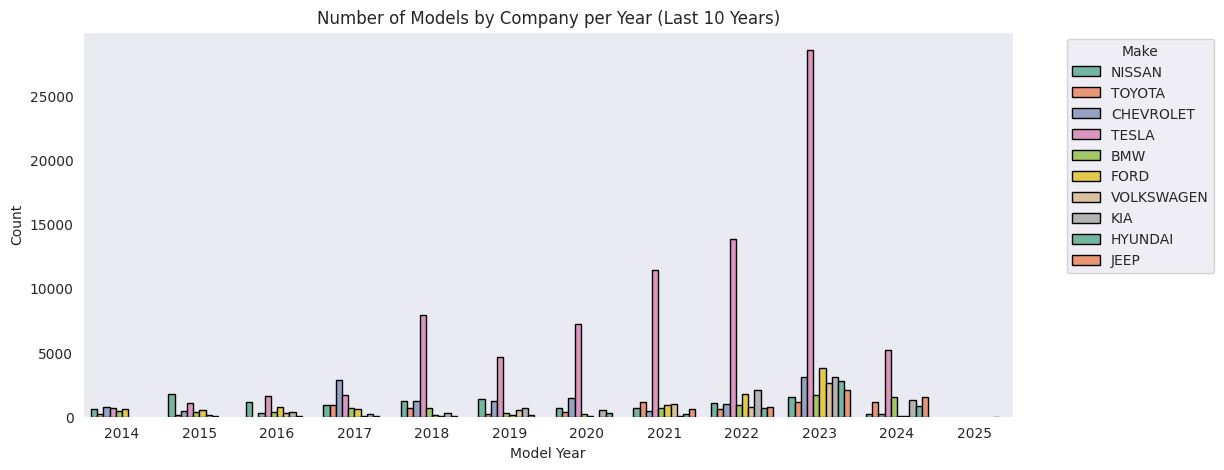

In [34]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Model Year', hue='Make', data=data, palette='Set2', edgecolor='black')
plt.title('Number of Models by Company per Year (Last 10 Years)')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Tesla-Specific Analysis
1. Which State Has the Most Tesla Vehicles?


<ipython-input-36-01dcf92d6bb1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




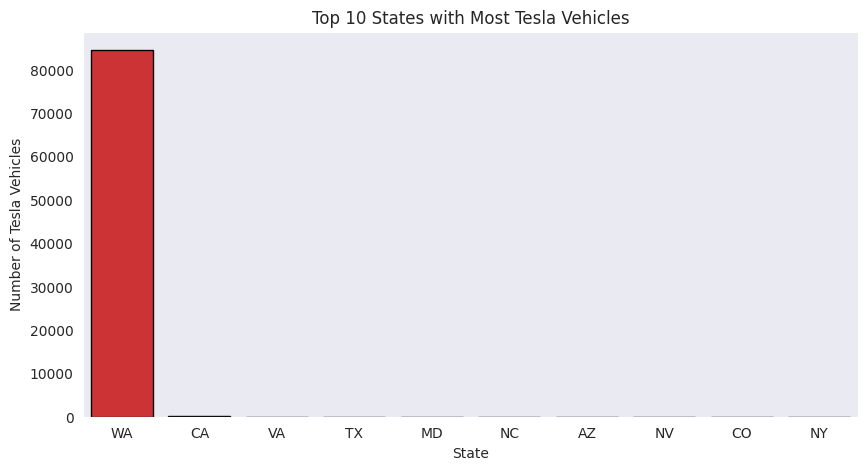

In [36]:
data_TESLA = ev[ev['Make'] == 'TESLA']
top_10_states_TESLA = data_TESLA['State'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_states_TESLA.index, y=top_10_states_TESLA.values, palette='Set1', edgecolor='black')
plt.title('Top 10 States with Most Tesla Vehicles')
plt.xlabel('State')
plt.ylabel('Number of Tesla Vehicles')
plt.show()


# 2. Most Common Tesla Model Year

<ipython-input-37-e6c09fcfb040>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




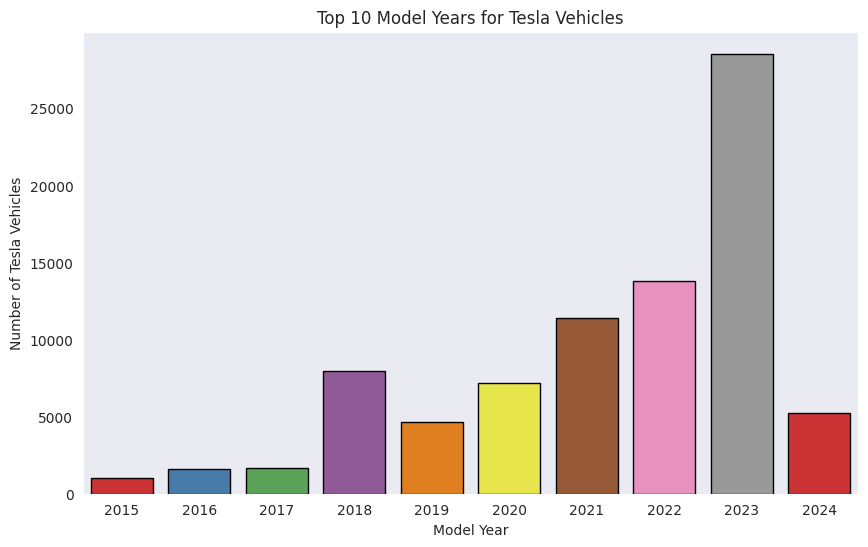

In [37]:
top_10_year_TESLA = data_TESLA['Model Year'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_year_TESLA.index, y=top_10_year_TESLA.values, palette='Set1', edgecolor='black')
plt.title('Top 10 Model Years for Tesla Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Number of Tesla Vehicles')
plt.show()


# Location-Based Analysis
1. Scatter Plot of Vehicle Locations

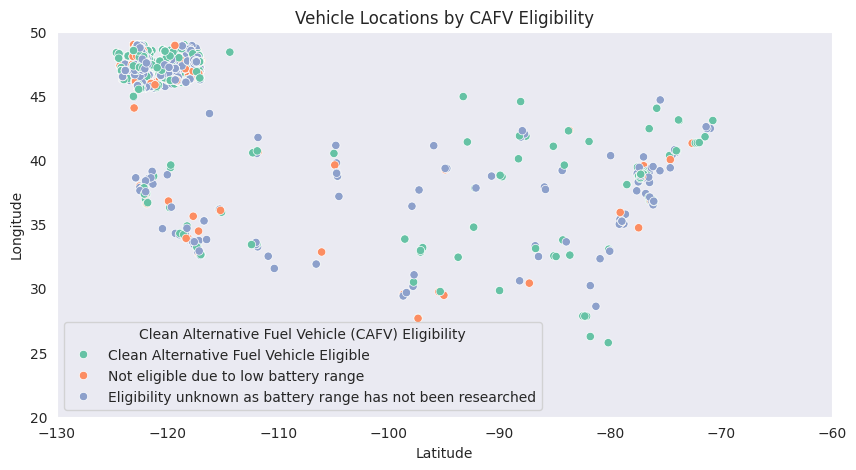

In [38]:
# Extracting Latitude and Longitude from 'Vehicle Location'
data['Latitude'] = data['Vehicle Location'].apply(lambda x: float(x.split(' ')[1][1:]))
data['Longitude'] = data['Vehicle Location'].apply(lambda x: float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='Set2')
plt.title('Vehicle Locations by CAFV Eligibility')
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.show()


# 2. Scatter Plot by Electric Vehicle Type

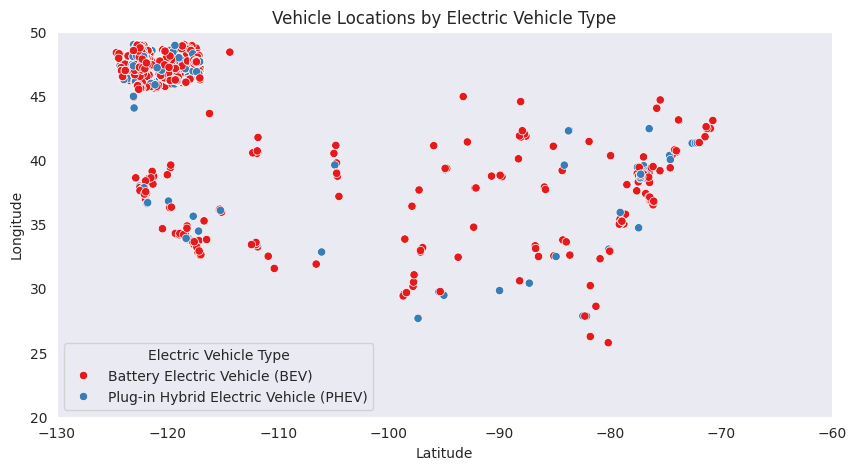

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Electric Vehicle Type', palette='Set1')
plt.title('Vehicle Locations by Electric Vehicle Type')
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.show()


State-Wise Distribution of Electric Vehicles

In [42]:
state_data = ev.groupby('State').size().reset_index(name='Count')

fig = px.choropleth(state_data,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    color_continuous_scale="greens",
                    scope="usa",
                    title='State-Wise Distribution of Electric Vehicles')
fig.show()
